Autores: ....

### EDA

#### Normalización de datos y validación

* Utilizamos info() para revisar la estructura y los tipos de datos del conjunto.
    * Los detalles concretos con shape, columns o dtypes.
* Clasificación de región en Regiones y Ciudades
* Explorar datos, fechas, nulos, columnas innecesarias
* Discusión sobre qué hacer con los datos de semanas que faltan (interpolante)

##### Mostrar la estructura de datos del dataset avocados

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import avocado_manager as av
av.init()
df_cp = av.df("df_cp")
print(df_cp.info())

df_cp_cleaned = df_cp
df_cp_cleaned['Suma Volums'] = df_cp_cleaned['Volume_Hass_S' ]+ df_cp_cleaned['Volume_Hass_L']+ df_cp_cleaned['Volume_Hass_XL' ]
df_cp_cleaned['Variacio'] = (df_cp_cleaned['Total Volume'] - df_cp_cleaned['Suma Volums'])*100/df_cp_cleaned['Total Volume']
av.add(df_cp_cleaned,'df_cleaned')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           18249 non-null  int64         
 1   Date            18249 non-null  datetime64[ns]
 2   AveragePrice    18249 non-null  float64       
 3   Total Volume    18249 non-null  float64       
 4   Volume_Hass_S   18249 non-null  float64       
 5   Volume_Hass_L   18249 non-null  float64       
 6   Volume_Hass_XL  18249 non-null  float64       
 7   Total Bags      18249 non-null  float64       
 8   Small Bags      18249 non-null  float64       
 9   Large Bags      18249 non-null  float64       
 10  XLarge Bags     18249 non-null  float64       
 11  type            18249 non-null  object        
 12  year            18249 non-null  int64         
 13  region          18249 non-null  object        
 14  region_class    18249 non-null  object        
 15  Su

In [2]:
data_shape = df_cp.shape
print(f"\nForma del DataFrame (filas, columnas): {data_shape}")

column_names = df_cp.columns
print(f"\nNombres de Columnas: {column_names}")
 
data_types = df_cp.dtypes
print(f"\nTipos de datos de cada columna:\n{data_types}")


Forma del DataFrame (filas, columnas): (18249, 15)

Nombres de Columnas: Index(['index', 'Date', 'AveragePrice', 'Total Volume', 'Volume_Hass_S',
       'Volume_Hass_L', 'Volume_Hass_XL', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'region_class'],
      dtype='object')

Tipos de datos de cada columna:
index                      int64
Date              datetime64[ns]
AveragePrice             float64
Total Volume             float64
Volume_Hass_S            float64
Volume_Hass_L            float64
Volume_Hass_XL           float64
Total Bags               float64
Small Bags               float64
Large Bags               float64
XLarge Bags              float64
type                      object
year                       int64
region                    object
region_class              object
dtype: object


##### Nuestra clasifiacion de clases de regiones

In [3]:
print("Nuestra clasifiacion de clases de regiones:",pd.unique(df_cp['region_class']))
display(df_cp.head(5))

Nuestra clasifiacion de clases de regiones: ['City' 'Region' 'GreaterRegion' 'TotalUS']


index       Date  AveragePrice  Total Volume  Volume_Hass_S  Volume_Hass_L  \
0      0 2015-12-27          1.33      64236.62        1036.74       54454.85   
1      1 2015-12-20          1.35      54876.98         674.28       44638.81   
2      2 2015-12-13          0.93     118220.22         794.70      109149.67   
3      3 2015-12-06          1.08      78992.15        1132.00       71976.41   
4      4 2015-11-29          1.28      51039.60         941.48       43838.39   

   Volume_Hass_XL  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0           48.16     8696.87     8603.62       93.25          0.0   
1           58.33     9505.56     9408.07       97.49          0.0   
2          130.50     8145.35     8042.21      103.14          0.0   
3           72.58     5811.16     5677.40      133.76          0.0   
4           75.78     6183.95     5986.26      197.69          0.0   

           type  year  region region_class  
0  conventional  2015  Albany         City  
1  conventional  2015  Albany         City  
2  conventional  2015  Albany         City  
3  conventional  2015  Albany         City  
4  conventional  2015  Albany         City

##### Mostrar las regions top 10 por Total Volume

In [4]:
df_totales = df_cp.groupby('region')['Total Volume'].sum().reset_index()
display(df_totales.nlargest(10,'Total Volume').sort_values(by='Total Volume', ascending = False))
#df_largest = av.df("region_largest")
#display(df_largest)

region  Total Volume
51       TotalUS  5.864740e+09
52          West  1.086779e+09
6     California  1.028982e+09
45  SouthCentral  1.011280e+09
29     Northeast  7.132809e+08
46     Southeast  6.152384e+08
15    GreatLakes  5.896425e+08
25      Midsouth  5.083494e+08
22    LosAngeles  5.078965e+08
35        Plains  3.111885e+08

##### Identificar fechas faltantes por cada region

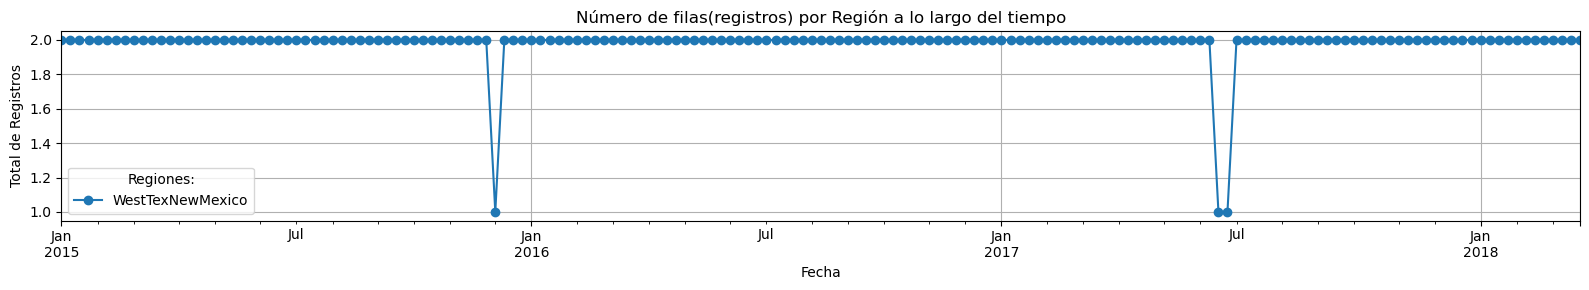

In [5]:
df_count = df_cp.groupby(['Date', 'region']).size().reset_index(name='Total')
df_pivot = df_count.pivot(index='Date', columns='region', values='Total').fillna(0)
diferencias = df_pivot.apply(lambda x: x.nunique() > 1, axis=0)

regiones_con_diferencias = diferencias[diferencias].index.tolist()
df_pivot[regiones_con_diferencias].plot(kind='line', marker='o',figsize=(16, 3))
plt.title('Número de filas(registros) por Región a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Registros')
plt.legend(title='Regiones:')
plt.grid(); plt.tight_layout() #plt.xticks(rotation=90)
plt.show()

##### Realiza un análisis exploratorio para entender la estructura del conjunto, incluyendo el número de filas y columnas, tipos de datos y valores faltantes. 

* Imprime la cantidad de valores faltantes por columna utilizando isnull().

In [6]:
print(f"Cantidad de nulls: {df_cp.isnull().sum()}")
#df.isnull
#missing_values = pd.isnull(df)

# Resumen Estadístico
data_summary = df_cp.describe()
print("\nResumen Estadístico:")
print(data_summary)

# series de tiempo
print("\nseries de tiempo:")
df_cp['Date'] = pd.to_datetime(df_cp['Date'])
ventas_mensual = df_cp.groupby(df_cp['Date'].dt.to_period("M"))['Total Volume'].sum().reset_index()
display(ventas_mensual)

Cantidad de nulls: index             0
Date              0
AveragePrice      0
Total Volume      0
Volume_Hass_S     0
Volume_Hass_L     0
Volume_Hass_XL    0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags       0
type              0
year              0
region            0
region_class      0
dtype: int64

Resumen Estadístico:
              index                           Date  AveragePrice  \
count  18249.000000                          18249  18249.000000   
mean    9124.000000  2016-08-13 23:30:43.498273792      1.405978   
min        0.000000            2015-01-04 00:00:00      0.440000   
25%     4562.000000            2015-10-25 00:00:00      1.100000   
50%     9124.000000            2016-08-14 00:00:00      1.370000   
75%    13686.000000            2017-06-04 00:00:00      1.660000   
max    18248.000000            2018-03-25 00:00:00      3.250000   
std     5268.176867                            NaN      0.402677   

       Total Volume  Volume_Hass_

Date  Total Volume
0   2015-01  3.180852e+08
1   2015-02  3.626376e+08
2   2015-03  4.185831e+08
3   2015-04  3.441444e+08
4   2015-05  4.837840e+08
5   2015-06  3.818267e+08
6   2015-07  3.567019e+08
7   2015-08  4.192448e+08
8   2015-09  3.292188e+08
9   2015-10  3.057761e+08
10  2015-11  3.694400e+08
11  2015-12  2.960259e+08
12  2016-01  4.754058e+08
13  2016-02  4.286458e+08
14  2016-03  3.912124e+08
15  2016-04  4.018328e+08
16  2016-05  5.612305e+08
17  2016-06  4.103282e+08
18  2016-07  4.672753e+08
19  2016-08  3.707970e+08
20  2016-09  3.623033e+08
21  2016-10  3.602018e+08
22  2016-11  2.602093e+08
23  2016-12  3.314478e+08
24  2017-01  5.333330e+08
25  2017-02  4.714672e+08
26  2017-03  3.589034e+08
27  2017-04  4.898145e+08
28  2017-05  4.257305e+08
29  2017-06  4.104107e+08
30  2017-07  4.749037e+08
31  2017-08  3.383330e+08
32  2017-09  2.847795e+08
33  2017-10  3.627780e+08
34  2017-11  3.245193e+08
35  2017-12  4.593329e+08
36  2018-01  4.297071e+08
37  2018-02  4.977782e+08
38  2018-03  4.552531e+08

#### Visión global de datos

* Analisis de Series Temporales y Ruido asociado
* Precios promedio calibre 
* Precios promedio por bolsa
* Separar avocados convencional y organics
* Comparación precios promedio convencional y organico
* Representación de ventas totales sobre precio promedio ( por regiones o no )

##### Analisis de Series Temporales y Ruido asociado
Observaciones:

* TODO: Perido de 52 semanas para ver la evolucion a la lo largo de los 3 años ?

Ragos de fechas: mínima: 2015-01-04 00:00:00 máxima: 2018-03-25 00:00:00


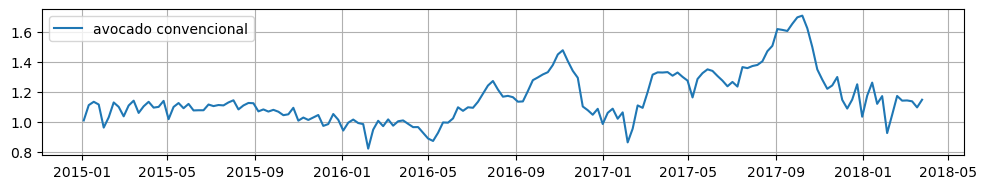

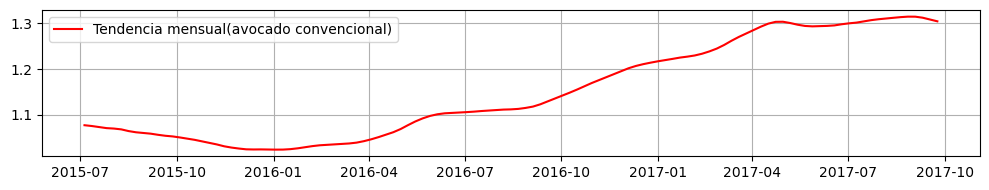

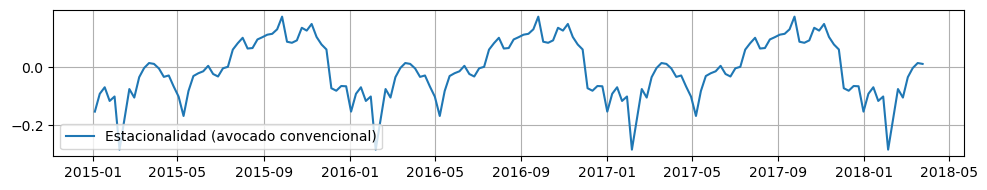

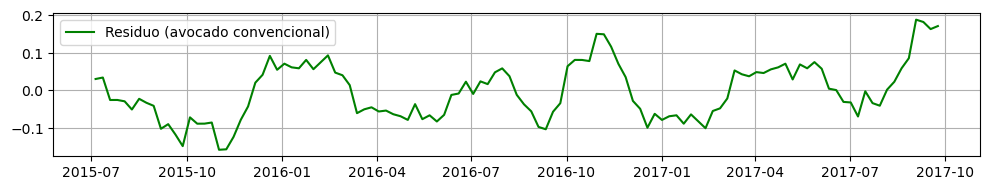

In [7]:
print(f"Ragos de fechas: mínima: {df_cp.Date.min()} máxima: {df_cp.Date.max()}")

df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()
df_cp_conventional = df_cp[df_cp['type'] =='conventional']#[['Date', 'AveragePrice']]
df_grouped = df_cp_conventional.groupby('Date')['AveragePrice'].mean()

# Descomposicio de la serie de tiemps: 39 mesos si considerem que tenim del 1-1-2015 fins al 25-3-2018
df_decomp = seasonal_decompose(df_grouped, model='additive', period=(int)(52*1)) #maxim: 84

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.observed, label='avocado convencional')
plt.legend(loc='best');plt.grid(True)
#plt.title('Tendencia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.trend, color='red', label='Tendencia mensual(avocado convencional)')
plt.legend(loc='best');plt.grid(True)
#plt.title('Tendencia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.seasonal, label='Estacionalidad (avocado convencional)')
plt.legend(loc='best');plt.grid(True)
#plt.title('Estacionalidad')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(df_decomp.resid, color='green', label='Residuo (avocado convencional)')
plt.legend(loc='best');plt.grid(True)
#plt.title('Residuo')
plt.tight_layout()
plt.show()

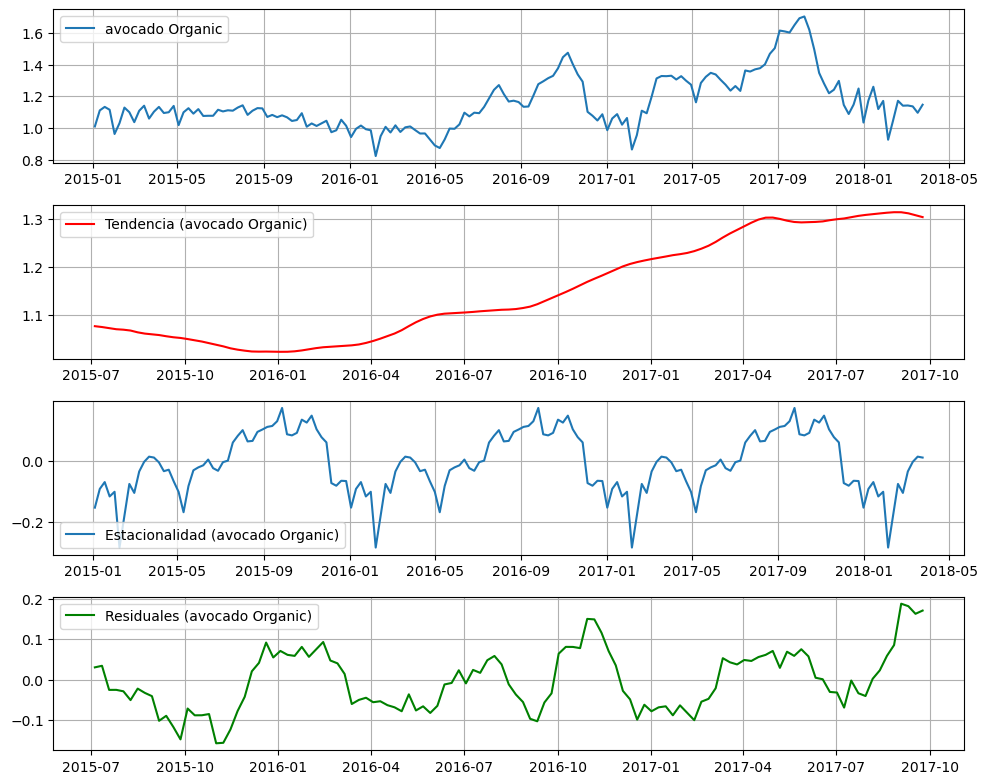

In [8]:
#print("Organic")
df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()
df_cp_organic = df_cp[df_cp['type'] =='organic']
df_grouped = df_cp_conventional.groupby('Date')['AveragePrice'].mean()
# Descomposicio de la serie de tiemps: 39 mesos si considerem que tenim del 1-1-2015 fins al 25-3-2018
df_decomp = seasonal_decompose(df_grouped, model='additive', period=(int)(52*1)) #maxim: 84
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df_grouped, label='avocado Organic')
plt.legend(loc='best');plt.grid(True)
plt.subplot(412)
plt.plot(df_decomp.trend, color='red', label='Tendencia (avocado Organic)')
plt.legend(loc='best');plt.grid(True)
plt.subplot(413)
plt.plot(df_decomp.seasonal,label='Estacionalidad (avocado Organic)')
plt.legend(loc='best');plt.grid(True)
plt.subplot(414)
plt.plot(df_decomp.resid, color='green',label='Residuales (avocado Organic)')
plt.legend(loc='best');plt.grid(True)
plt.tight_layout()
plt.show()

##### Precios promedio calibre 

##### Precios promedio por bolsa

##### Precio medio y volumen total
Observaciones:

* TODO: Estamos mostrado los de tipo convencional. Que es el grupo de puntos de la parte superior ?

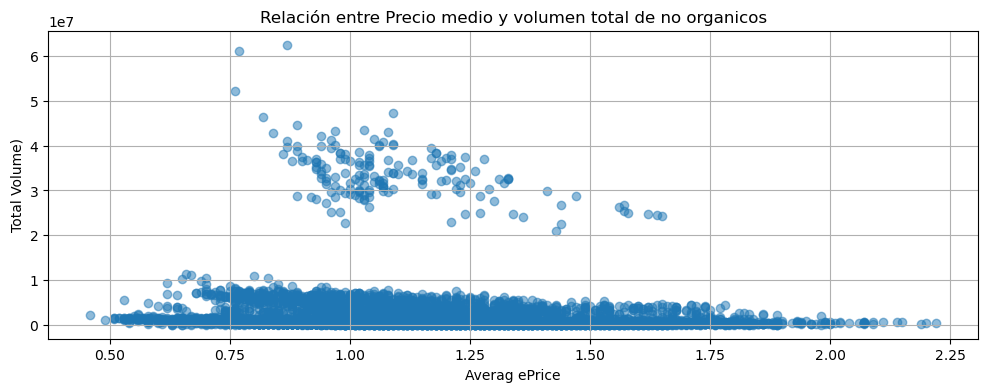

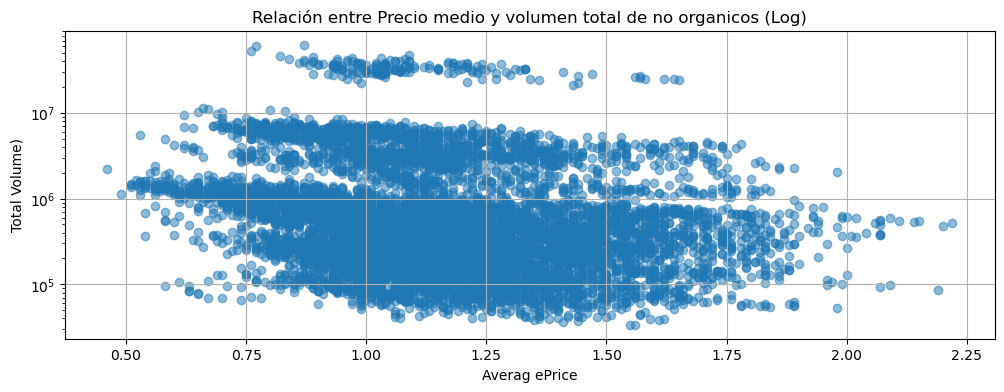

In [9]:
df_cp_tmp = df_cp[df_cp['type']=='conventional']

plt.figure(figsize=(12, 4))
plt.scatter(df_cp_tmp['AveragePrice'], df_cp_tmp['Total Volume'], alpha=0.5)
plt.title('Relación entre Precio medio y volumen total de no organicos')
plt.xlabel('Averag ePrice')
plt.ylabel('Total Volume)')
plt.grid(True); #plt.legend(loc='best')
plt.show()

plt.figure(figsize=(12, 4))
plt.scatter(df_cp_tmp['AveragePrice'], df_cp_tmp['Total Volume'], alpha=0.5)
plt.title('Relación entre Precio medio y volumen total de no organicos (Log)')
plt.xlabel('Averag ePrice')
plt.ylabel('Total Volume)')
plt.grid(True); #plt.legend(loc='best')
plt.yscale('log')
plt.show()

# df_cp.groupby(by=['region']).count()

##### Separar avocados convencional y organics

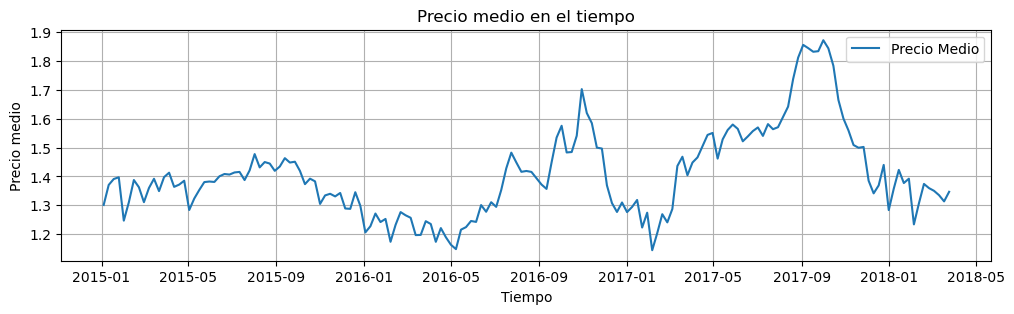

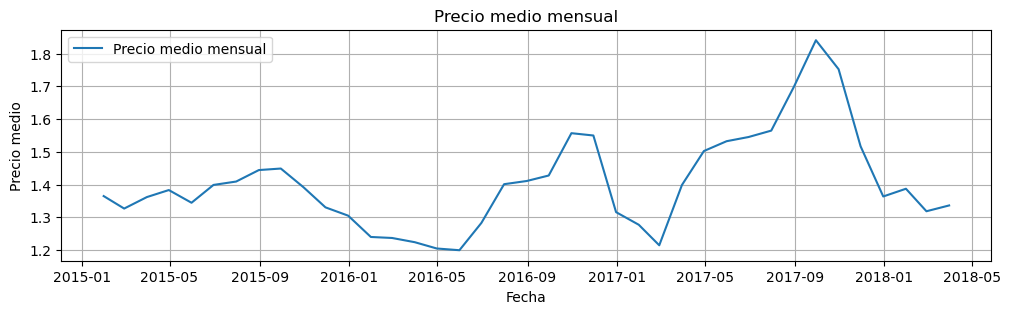

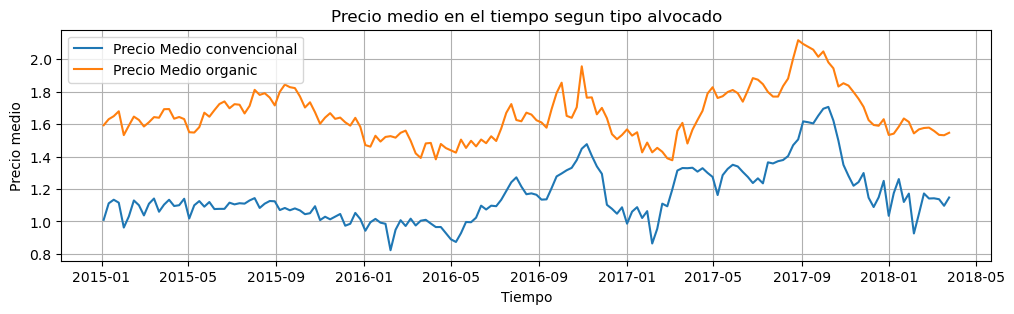

In [10]:
df_grouped = df_cp.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 3))
plt.plot(df_grouped, label ='Precio Medio')
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Precio medio')
plt.title('Precio medio en el tiempo')
plt.grid(True); plt.xticks(rotation=0)
plt.show()

df_grouped = df_cp.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean()
plt.figure(figsize=(12,3))
plt.plot(df_grouped, label='Precio medio mensual') #plt.plot(df_grouped.index, df_grouped.values)
plt.legend(loc='best')
plt.xlabel('Fecha')
plt.ylabel('Precio medio')
plt.title('Precio medio mensual')
plt.grid(True); plt.xticks(rotation=0)
plt.show()

df_cp_conventional = df_cp[df_cp['type'] =='conventional'] #[['Date', 'AveragePrice']]
df_grouped_conv = df_cp_conventional.groupby('Date')['AveragePrice'].mean()

df_cp_organic = df_cp[df_cp['type'] =='organic'] #[['Date', 'AveragePrice']]
df_grouped_orga = df_cp_organic.groupby('Date')['AveragePrice'].mean()

plt.figure(figsize=(12, 3))
plt.plot(df_grouped_conv, label ='Precio Medio convencional')
plt.plot(df_grouped_orga, label ='Precio Medio organic')
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Precio medio')
plt.title('Precio medio en el tiempo segun tipo alvocado')
plt.grid(True); plt.xticks(rotation=0)
plt.show()

#df_grouped

##### Comparación precios promedio convencional y organico
Observaciones:
* TODO: Aqui veiem que existeixen unes regions mes relevants que altres. Caldria fer una separació?

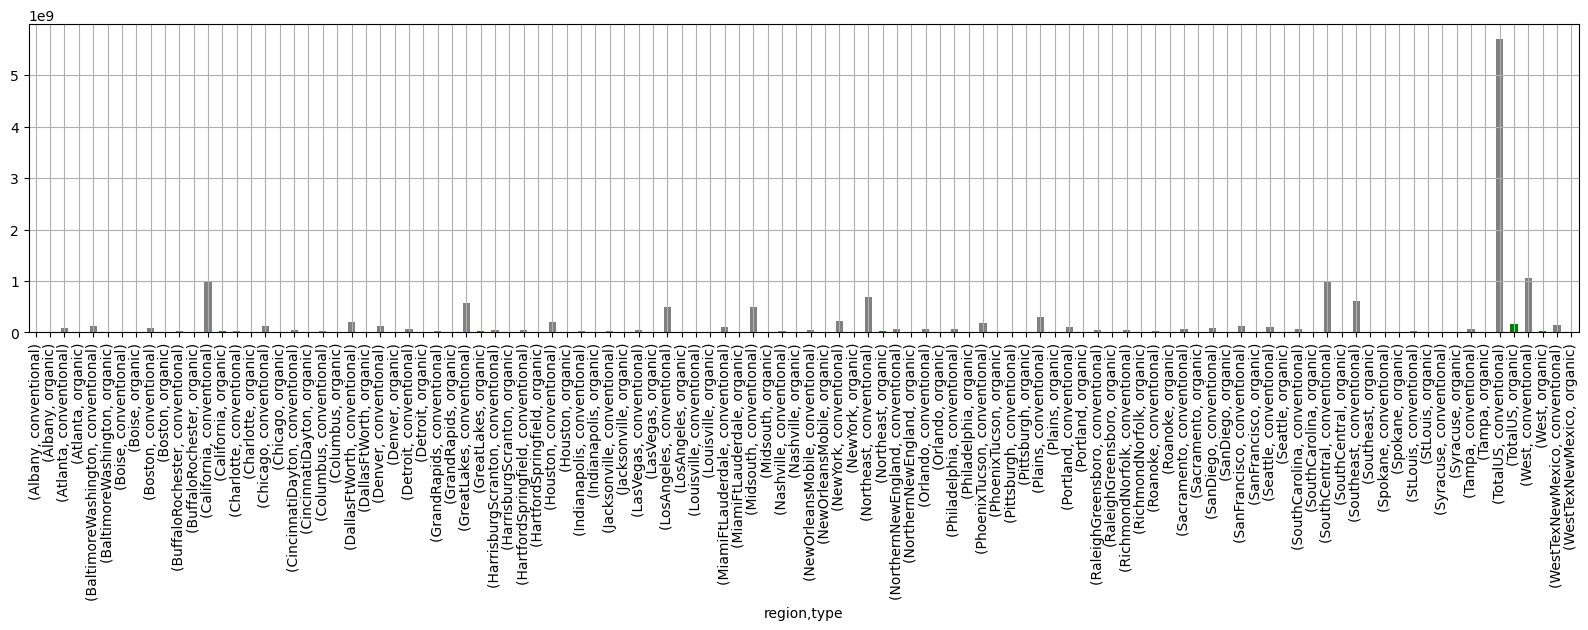

In [11]:
df_subset = df_cp#[df_cp['region']!= 'TotalUS']
pd.unique(df_subset['region'])

grouped = df_subset.groupby(['region', 'type'])['Total Volume'].sum()

fig, ax= plt.subplots(figsize=(20,4))
grouped.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

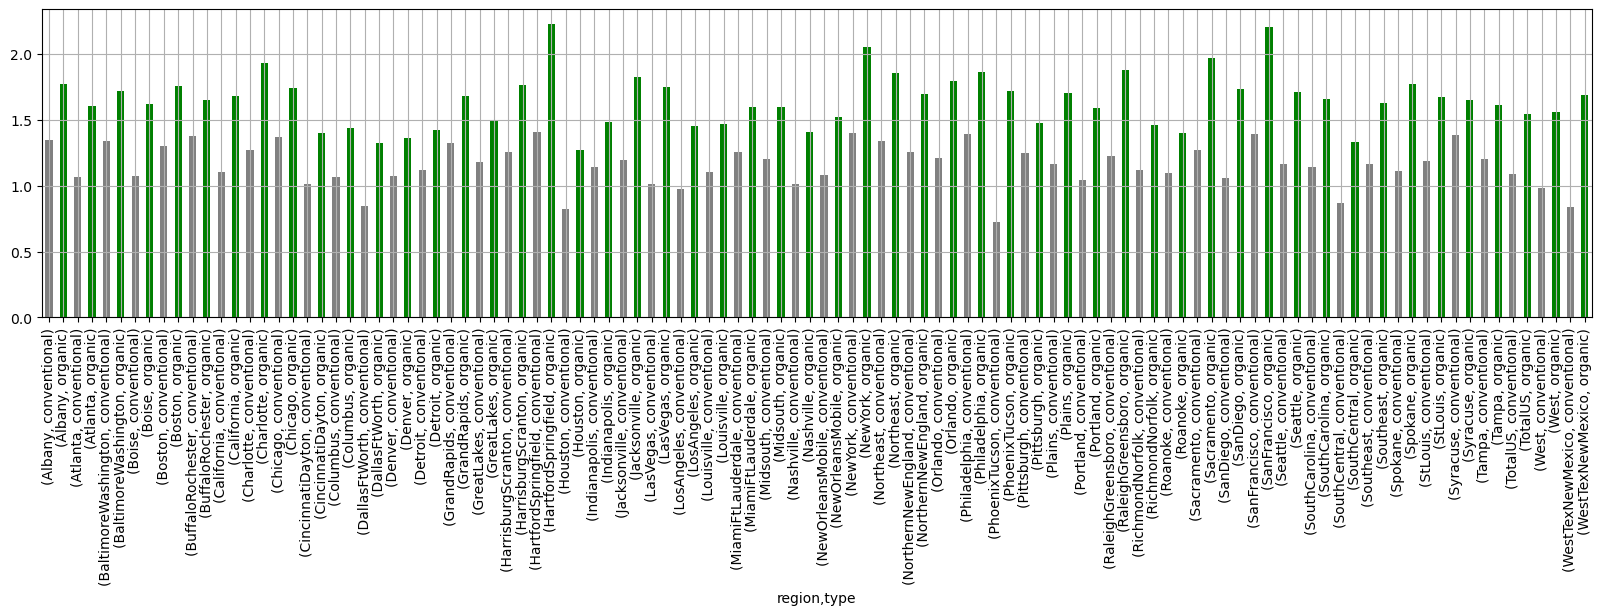

In [12]:
price_group = df_subset.groupby(['region', 'type'])['AveragePrice'].mean()#.nlargest(10)

fig, ax= plt.subplots(figsize=(20,4))
price_group.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

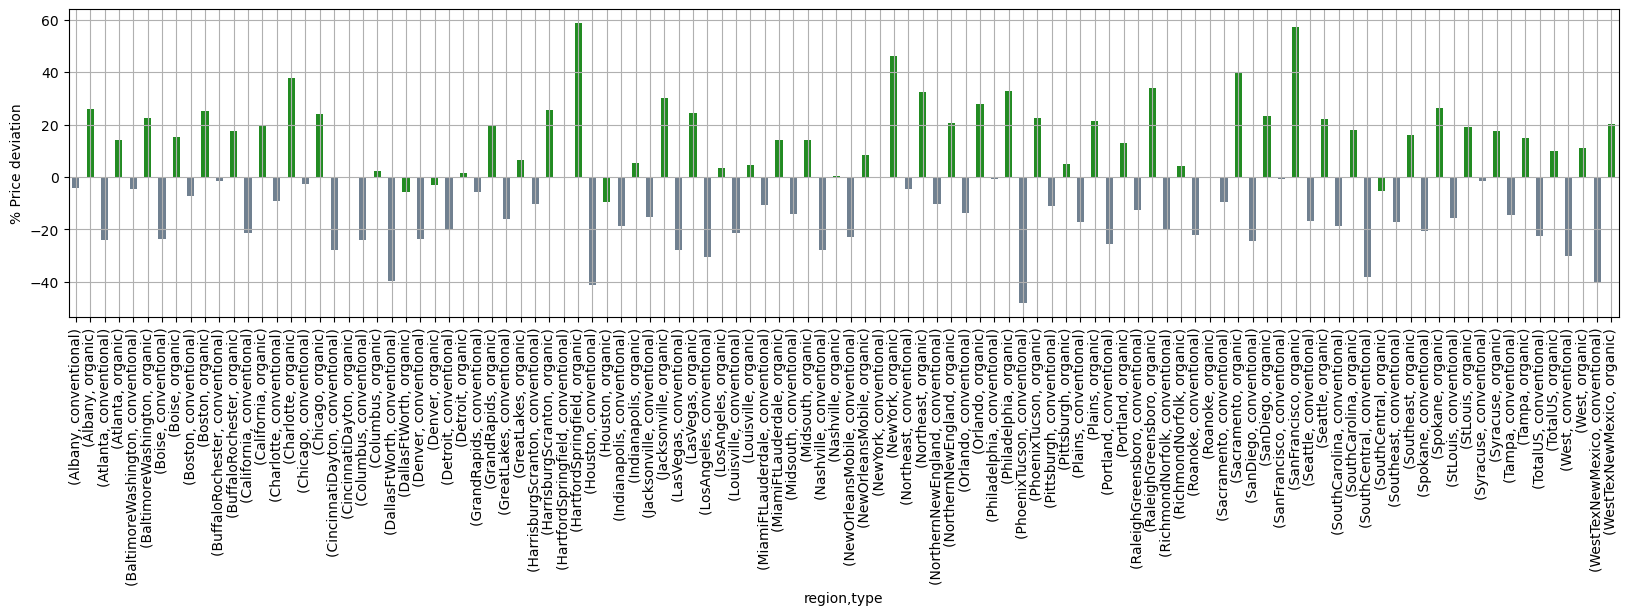

In [13]:
## Aquest gràfic es espectacular, y ens permet veure que sempre són els alvocats orgànics els que costen més que la mitjana.
avocados_region_mean = df_subset.groupby(['region','type'])['AveragePrice'].mean()#.nlargest(6)

total_mean = df_subset['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation', color = ['slategray', 'forestgreen'])
plt.grid()

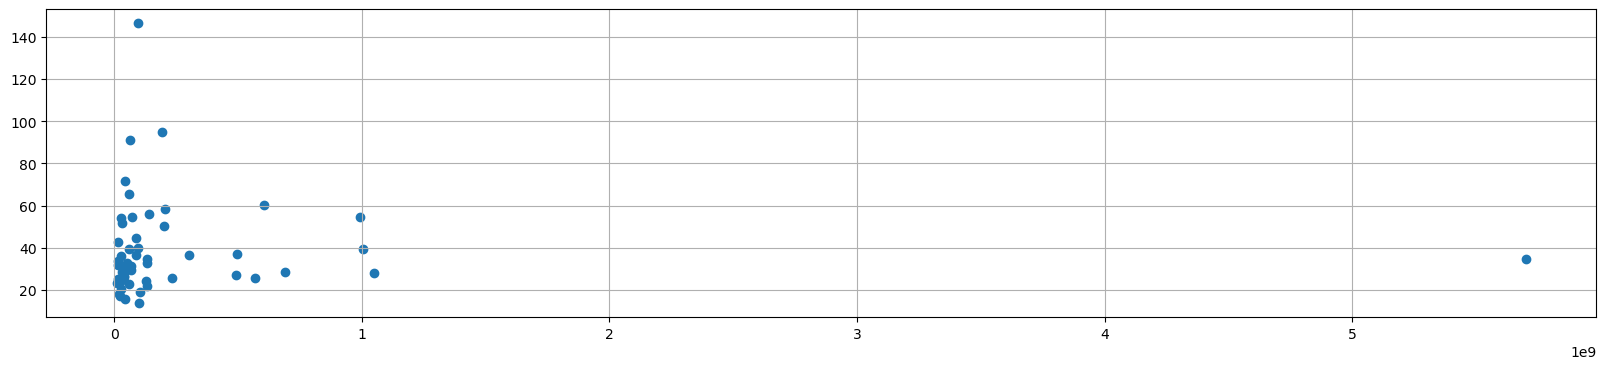

In [14]:
# Si mirem la proporcio, en general es manté constant. No hi ha ningun interes per a tornar a ho natural a les gran ciutats o extensions.
# Si acas hi ha més divergencia en extensions menors.
unstacked_type= grouped.unstack()
unstacked_type['Proportion'] = unstacked_type['conventional']/unstacked_type['organic']

fig, ax= plt.subplots(figsize=(20,4))
x_values= unstacked_type['conventional']
y_values= unstacked_type['Proportion']

ax.scatter(x=x_values, y= y_values )
# plt.ylim(0, 0.3*10**9)
plt.grid()

##### Ventas en el tiempo y separación entre convencional / orgánico

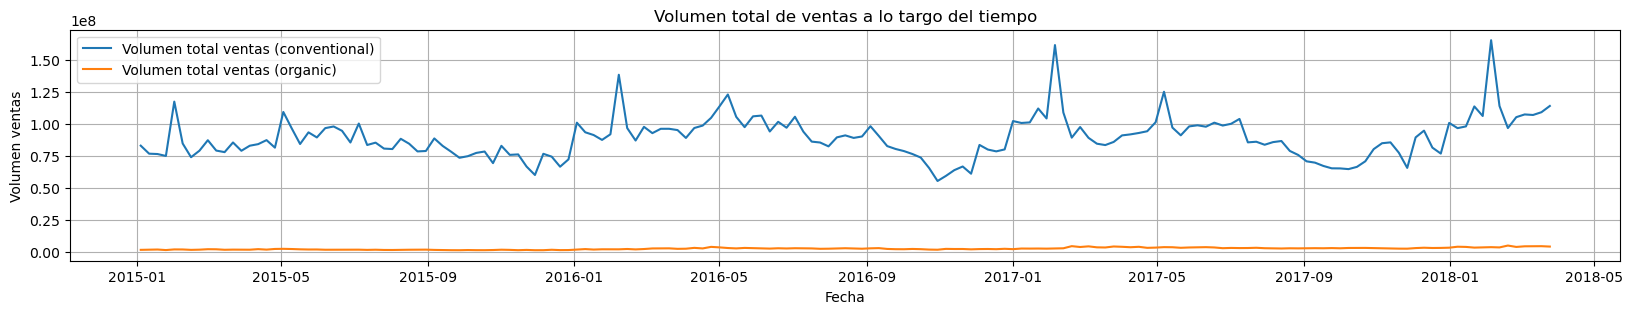

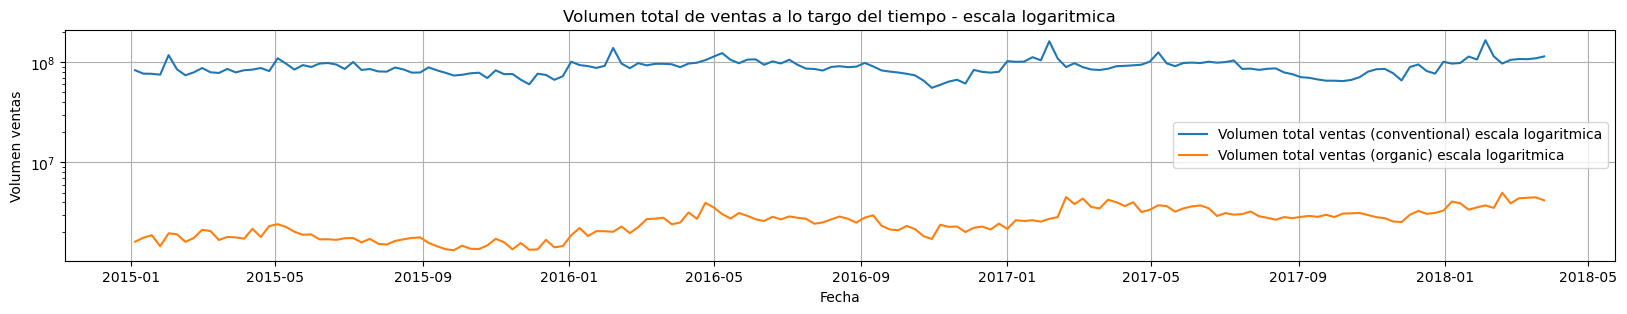

In [15]:
df_date_volume = df_cp[['Date', 'Total Volume']]
#df_cp_organic = df_cp[df_cp['type'] =='organic'] #[['Date', 'AveragePrice']]
#df_date_volume
df_grouped_conventional = df_date_volume[df_cp['type'] =='conventional'].groupby('Date').sum('Total Volume')
df_grouped_organic = df_date_volume[df_cp['type'] =='organic'].groupby('Date').sum('Total Volume')

# Graficar
plt.figure(figsize=(20,3))
plt.plot(df_grouped_conventional, label='Volumen total ventas (conventional)')
plt.title('Volumen total de ventas a lo targo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.legend(loc='best'); plt.grid(True)
plt.plot(df_grouped_organic, label='Volumen total ventas (organic)')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.legend(loc='best'); plt.grid(True)
plt.show()

plt.figure(figsize=(20,3))
plt.plot(df_grouped_conventional, label='Volumen total ventas (conventional) escala logaritmica')
plt.title('Volumen total de ventas a lo targo del tiempo - escala logaritmica')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.yscale('log')
plt.legend(loc='best'); plt.grid(True)
plt.plot(df_grouped_organic, label='Volumen total ventas (organic) escala logaritmica')
plt.xlabel('Fecha')
plt.ylabel('Volumen ventas')
plt.yscale('log')
plt.legend(loc='best'); plt.grid(True)
plt.show()

##### Análisis de Cambios en Precios Anuales:

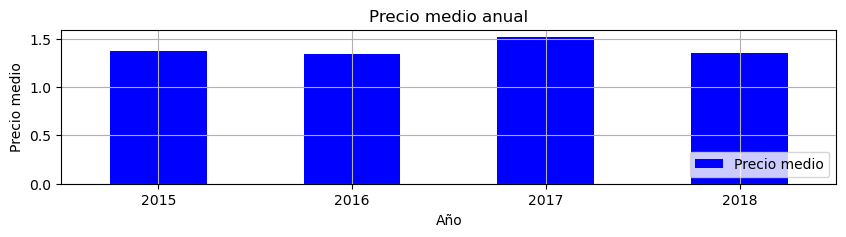

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

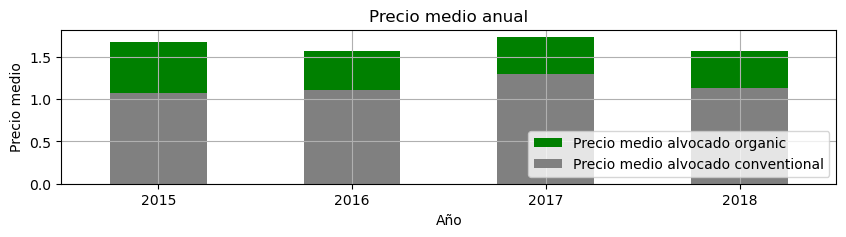

In [16]:
df_year_price = df_cp.groupby('year')['AveragePrice'].mean()
df_year_price_conventional = df_cp[df_cp['type'] =='conventional'].groupby('year')['AveragePrice'].mean()
df_year_price_organic = df_cp[df_cp['type'] =='organic'].groupby('year')['AveragePrice'].mean()

# Graficar
plt.figure(figsize=(10, 2)) 
df_year_price.plot.bar(label ='Precio medio', color ='blue', alpha=1) # x='aaa??',y='bbb??',
plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.title('Precio medio anual')
plt.legend(loc='lower right'); plt.grid(True)
plt.xticks(rotation=0)
plt.show()
display(df_year_price)

plt.figure(figsize=(10, 2)) 
df_year_price_organic.plot.bar(label ='Precio medio alvocado organic', color ='green') # x='aaa??',y='bbb??',
df_year_price_conventional.plot.bar(label ='Precio medio alvocado conventional', color ='grey') # x='aaa??',y='bbb??',
#df_year_price.plot.bar(label ='Precio medio', color ='blue', alpha=0.2) # x='aaa??',y='bbb??',
plt.xlabel('Año')
plt.ylabel('Precio medio')
plt.title('Precio medio anual')
plt.legend(loc='lower right'); plt.grid(True)
plt.xticks(rotation=0)
plt.show()

##### Representación de ventas totales sobre precio promedio ( por regiones o no )

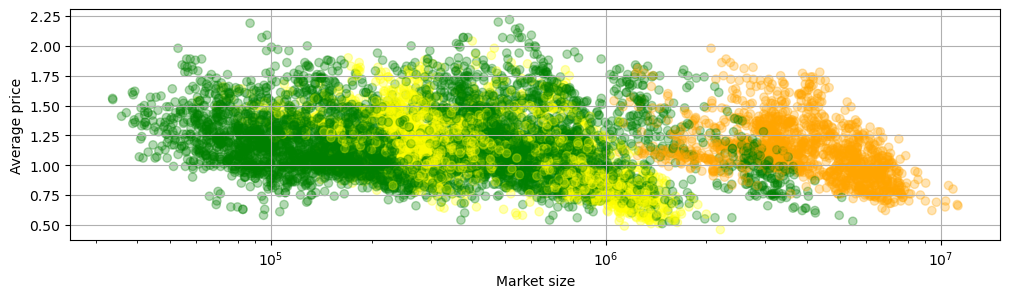

In [17]:
df_subset = df_cp[df_cp['region']!= 'TotalUS']
df_convencionals = df_subset[df_subset['type']=='conventional']

fig, ax= plt.subplots(figsize=(12,3))
x_values = df_convencionals['Total Volume']
y_values = df_convencionals['AveragePrice']
c_values= list(df_convencionals['region_class'].map(av.classification_colors()))

plt.scatter(x= x_values, y= y_values, c=c_values, alpha = 0.3)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size')
plt.grid()

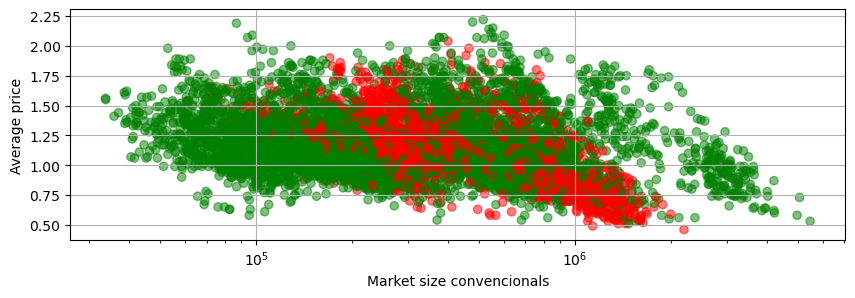

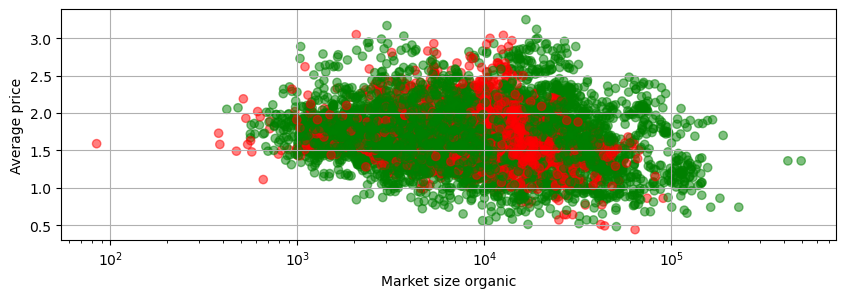

In [18]:
classification_colors = {'City':'green' ,'Region':'red' ,'GreaterRegion':'orange', 'TotalUS': 'blue'}

df_subset = av.df("df_city_region") # df_cp[df_cp['region']!= 'TotalUS']
df_organic = df_subset[df_subset['type']=='organic']
df_convencionals = df_subset[df_subset['type']=='conventional']

fig, ax= plt.subplots(figsize=(10,3))
x_values = df_convencionals['Total Volume']
y_values = df_convencionals['AveragePrice']
c_values= list(df_convencionals['region_class'].map(classification_colors))
plt.scatter(x= x_values, y= y_values, c=c_values, alpha = .5)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size convencionals')
plt.grid()

fig, ax= plt.subplots(figsize=(10,3))
x_values = df_organic['Total Volume']
y_values = df_organic['AveragePrice']
c_values= list(df_organic['region_class'].map(classification_colors))
plt.scatter(x= x_values, y= y_values, c=c_values, alpha = .5)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size organic')
plt.grid()

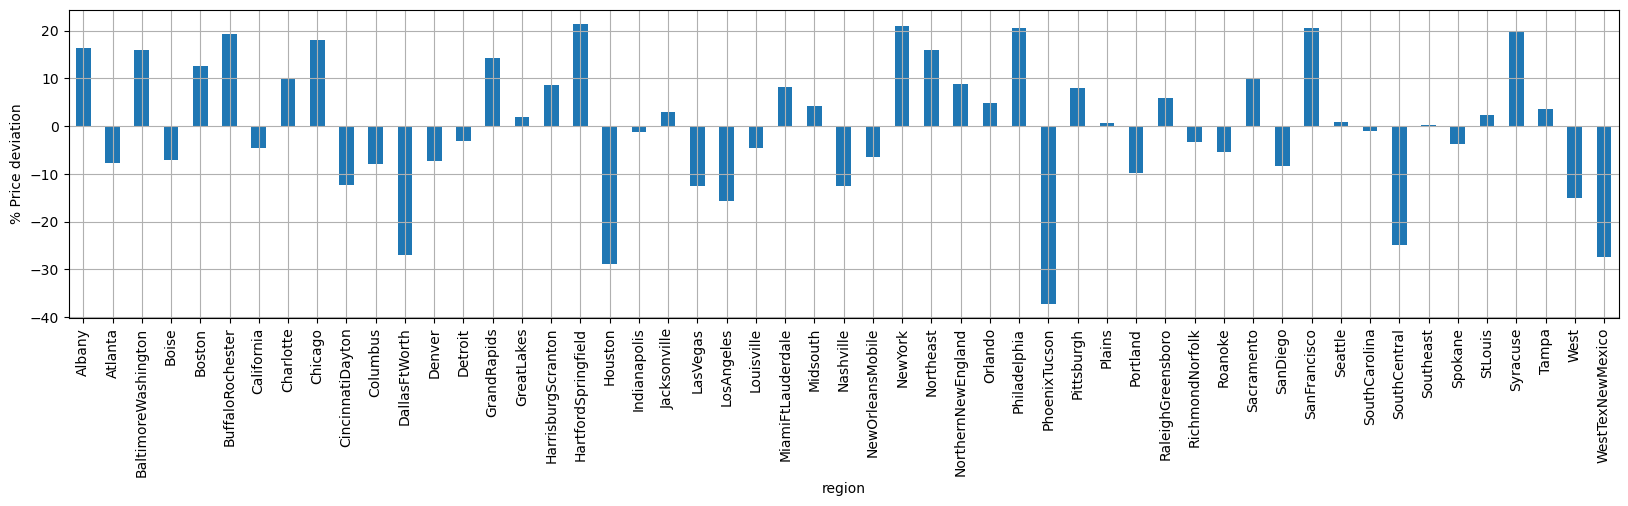

In [19]:
# Claramente hay sitios donde los aguacates son más baratos, miremos si tiene que ver con otras características
df_subset = df_cp[df_cp['region']!= 'TotalUS']
df_convencionals = df_subset[df_subset['type']=='conventional']
convencional_region_mean = df_convencionals.groupby('region')['AveragePrice'].mean()#.nlargest(6)
coloring=convencional_region_mean.index.map(av.region_classification()).map(av.classification_colors())
total_mean = df_convencionals['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = ((convencional_region_mean - total_mean)*100/total_mean)
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation')#, color= coloring)#, color= convencional_region_mean.index.map(classification_colors))
plt.grid()

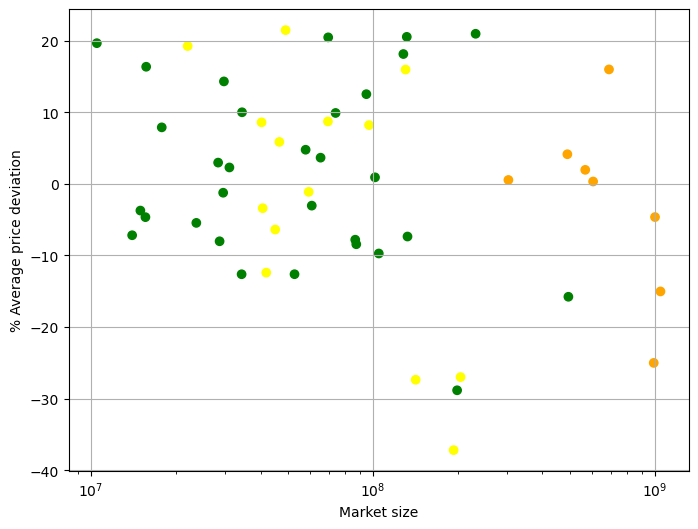

In [20]:
# Aqui podem veure que a majors mercats el preu mig tendeix a abaratirse. 
# Aqui estem prenent cada regio com equivalentment valida
# cambiar el 2018 no parece afectar los resultados

convencional_region_mean_total = df_convencionals.groupby('region').agg({'Total Volume':'sum', 'AveragePrice':'mean'})#.nlargest(6)
convencional_region_mean_total['region_class'] = convencional_region_mean_total.index.map(av.region_classification())

fig, ax= plt.subplots(figsize=(8,6))
x_values = convencional_region_mean_total['Total Volume']
total_mean = convencional_region_mean_total['AveragePrice'].mean()
y_values = (convencional_region_mean_total['AveragePrice'] - total_mean)*100/total_mean
c_values= list(convencional_region_mean_total['region_class'].map(av.classification_colors()))

plt.scatter(x= x_values, y= y_values, c=c_values)
plt.xscale('log')
plt.ylabel('% Average price deviation')
plt.xlabel('Market size')
plt.grid()

### ANALISIS

#### Separar alvocats convencionals i alvocats orgànics

#### Impacto del precio en las ventas

#### Estacionalidad por región

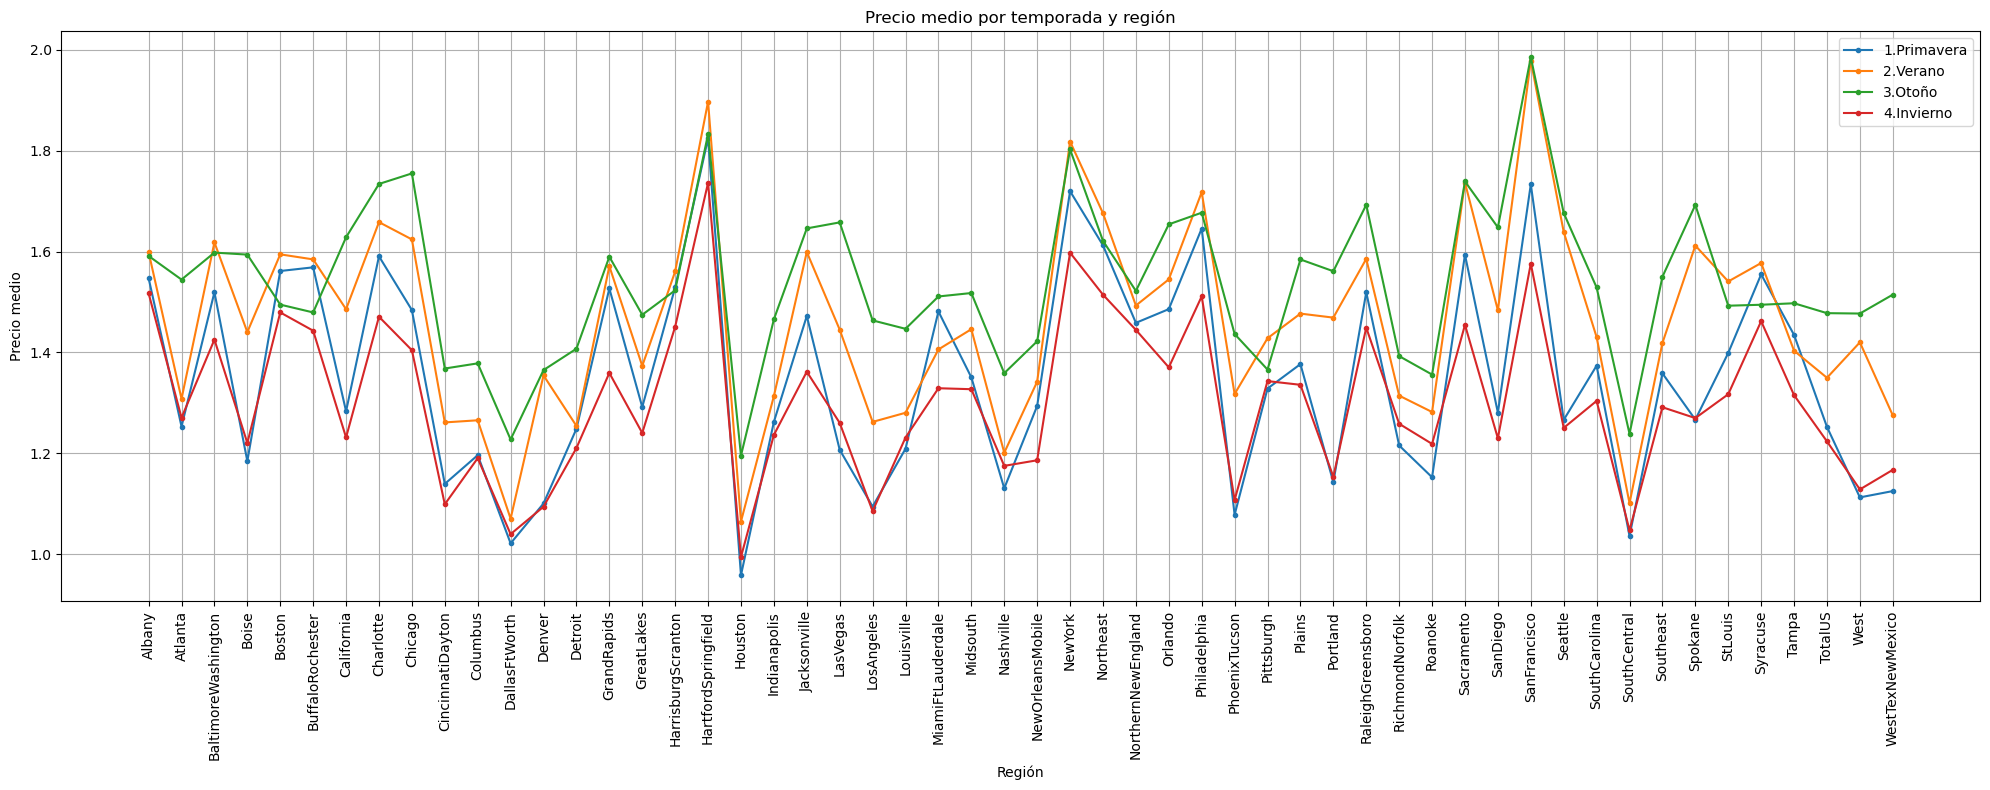

In [21]:
get_season = av.get_season()

df_date_price_volume = df_cp[['Date', 'region', 'AveragePrice', 'Total Volume']]
df_date_price_volume = df_date_price_volume.reset_index()
df_date_price_volume['Season'] = df_date_price_volume['Date'].apply(get_season)
# df_date_price_volume

df_grouped_mean = df_date_price_volume.groupby(['Season','region'])['AveragePrice'].mean()
df_grouped_mean = df_grouped_mean.reset_index()

seasons = df_grouped_mean['Season'].unique()
plt.figure(figsize=(20, 8)) 
for season in seasons:
    df_season = df_grouped_mean[df_grouped_mean['Season'] == season]
    plt.plot(df_season['region'], df_season['AveragePrice'], marker='.', label=season)
plt.title('Precio medio por temporada y región')
plt.xlabel('Región')
plt.ylabel('Precio medio')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#df_grouped_mean

#### Correlacion de les "grans regions" i regions amb volum total US
* TODO: IMPORTANT VOLUM VENTAS GREATERREGIONS == TOTALUS

In [ ]:
df_great_regions = df_cp[(df_cp['region_class']=='Region') | (df_cp['region_class']=='City')]
df_USA = df_cp[df_cp['region']=='TotalUS']
print((df_great_regions['Total Volume'].sum() - df_USA['Total Volume'].sum())*100/df_USA['Total Volume'].sum() )

-35.309628185172656


<AxesSubplot: title={'center': 'Market size'}, ylabel='Total Volume'>

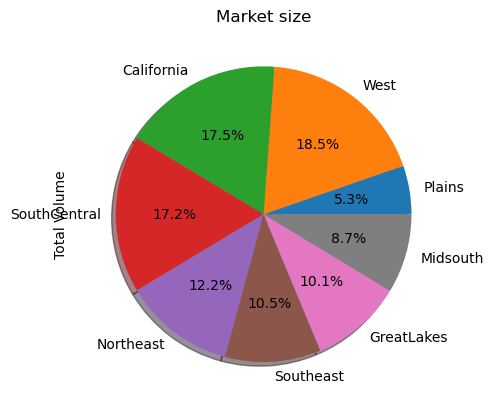

In [34]:
index_df= df_cp.copy()
index_df= index_df[index_df['region_class']=='City']

region_largest= list(index_df.groupby('region')['Total Volume'].sum().nlargest(3).index)
# region_largest.pop('TotalUS')

df_greatest_pie = df_cp.groupby('region')['Total Volume'].sum().nlargest(8)   #df_cp[df_cp['region'].isin(region_largest)]
df_greatest_pie.loc['TotalUS'] = 2*df_greatest_pie.loc['TotalUS'] - df_greatest_pie.loc[:].sum()
df_greatest_pie.rename( index={'TotalUS':'Plains'}, inplace=True)
df_greatest_pie.plot.pie(title="Market size", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)
#plt.legend(loc='best'); plt.grid(True) # figsize=(12,6)

#### Correlacion de volum total de les ciutats amb volum total US

#### Elasticidad

#### Analisis por Cohortes

#### Matriz de correlaciones de todas las variables según  apartado 5.6. En especial, precio medio y relación con diferentes calibres.

#### Dispersión entre variables claves según 5.2

 ### TODO

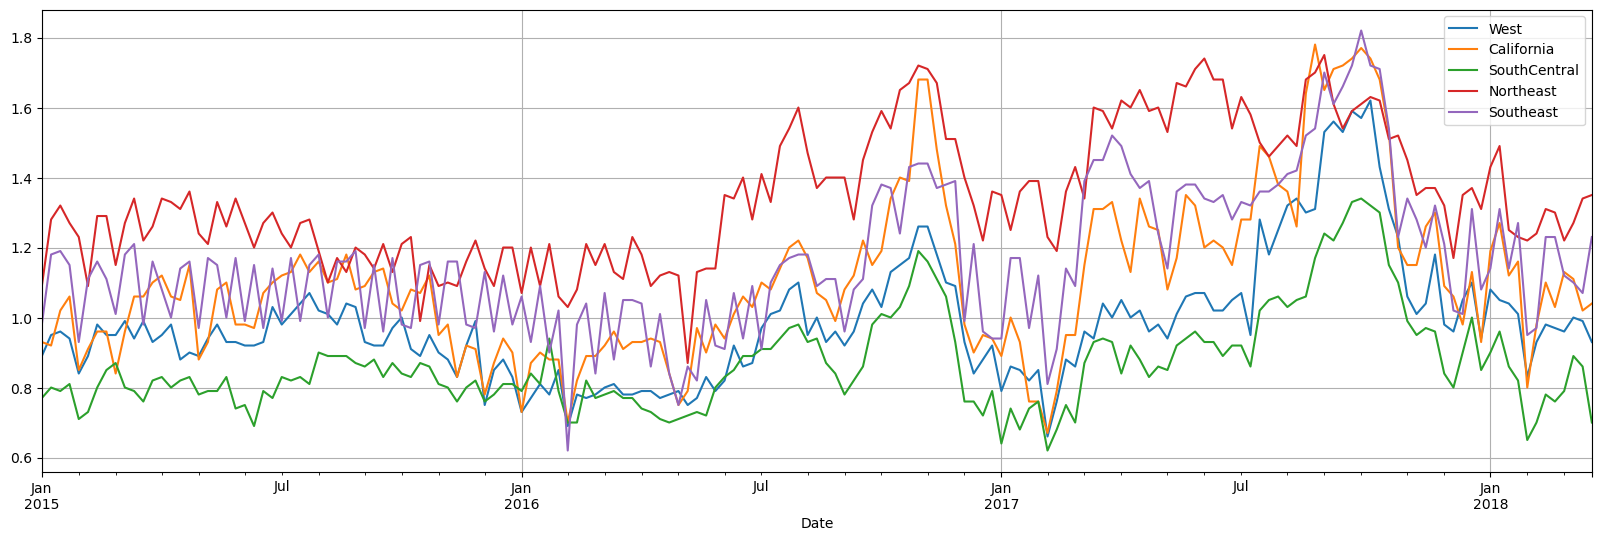

In [54]:
df_cp_cleaned = av.df("df_cleaned")

prova_= df_cp.copy()
index_df= df_cp.copy()
prova_= prova_[prova_['type']=='conventional']

#great_dates= df_cp_cleaned.copy()
#great_dates= great_dates[great_dates['type']=='conventional']

index_df= df_cp.copy()
index_df= index_df[index_df['region_class']=='GreaterRegion']

region_largest= list(index_df.groupby('region')['Total Volume'].sum().nlargest(5).index)
#region_largest#.append('TotalUS')
fig, ax= plt.subplots(figsize=(20,6))
for region in region_largest:
    prova_temp = prova_[prova_['region']==region]
    prova_temp=prova_temp.sort_values(by='Date')
    prova_temp.plot(x= 'Date', y= 'AveragePrice', ax=ax, label= region)

plt.grid()
plt.show()

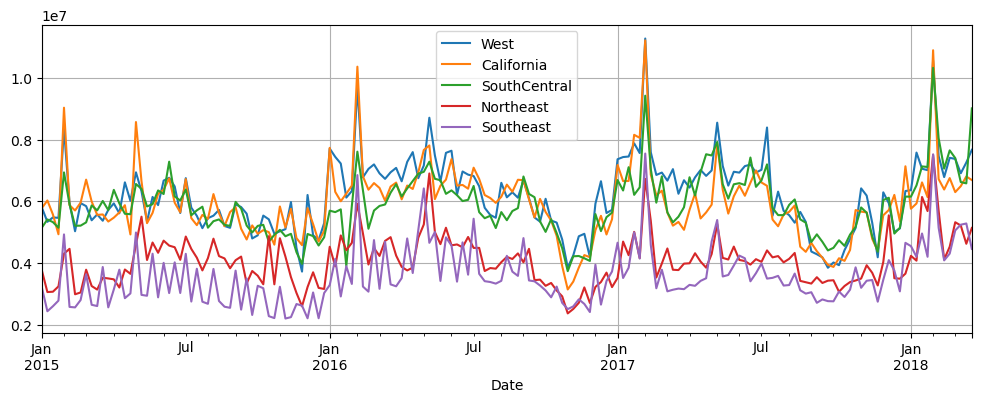

In [58]:
prova_= df_cp.copy()
index_df= df_cp.copy()
prova_= prova_[prova_['type']=='conventional']

index_df= index_df[index_df['region_class']=='GreaterRegion']
region_largest= list(index_df.groupby('region')['Total Volume'].sum().nlargest(5).index)
# region_largest.append('TotalUS')

fig, ax= plt.subplots(figsize=(12,4))
for region in region_largest:
    prova_temp = prova_[prova_['region']==region]
    prova_temp=prova_temp.sort_values(by='Date')
    prova_temp.plot(x= 'Date', y= 'Total Volume', ax=ax, label= region)
    plt.grid()

plt.show()

#### TODO: Creacion matrices correlacion instantania

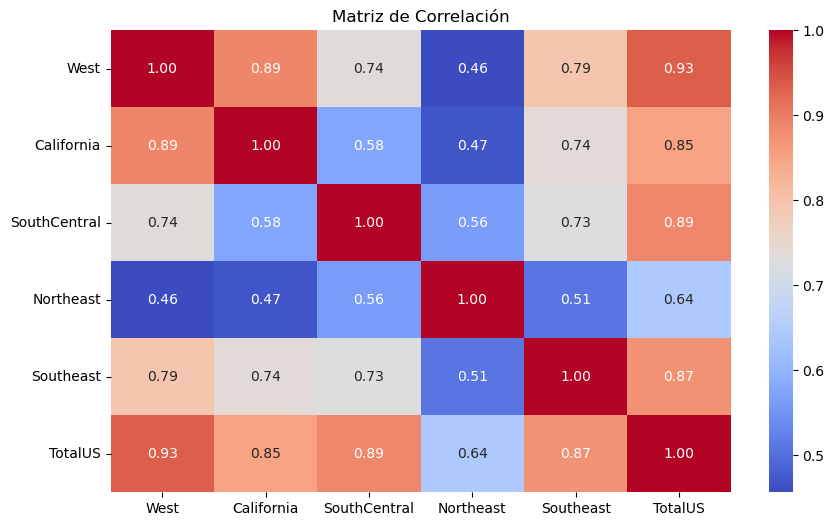

Variables altamente correlacionadas con otras: ['West', 'TotalUS']


In [60]:
prova_= df_cp.copy()
index_df= df_cp.copy()
prova_= prova_[prova_['type']=='conventional']
dictionary_to_regions={}

index_df= index_df[index_df['region_class']=='GreaterRegion']
region_largest= list(index_df.groupby('region')['Total Volume'].sum().nlargest(5).index)
region_largest.append('TotalUS')

for region in region_largest:
    prova_temp = prova_[prova_['region']==region]
    prova_temp=prova_temp.sort_values(by='Date')

    dictionary_to_regions[region] = list(prova_temp['Total Bags'])

df_corr = pd.DataFrame(dictionary_to_regions)
# display(df_corr)
corr_matrix = df_corr.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.9
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

<AxesSubplot: xlabel='region'>

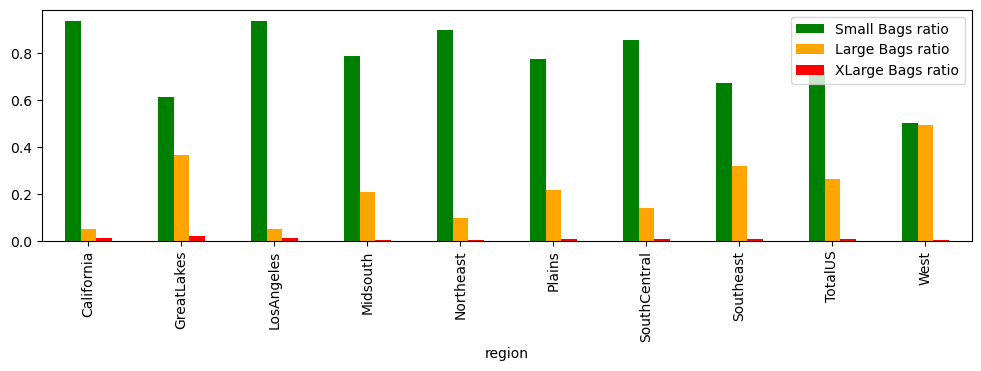

In [70]:
df_baggy = df_cp.copy()

region_largest= df_cp.groupby('region')['Total Volume'].sum().nlargest(10).index
df_baggy = df_baggy[df_baggy['region'].isin(region_largest)]

df_baggy['Small Bags ratio'] = df_baggy['Small Bags'] / df_baggy['Total Bags']
df_baggy['Large Bags ratio'] = df_baggy['Large Bags'] / df_baggy['Total Bags']
df_baggy['XLarge Bags ratio'] = df_baggy['XLarge Bags'] / df_baggy['Total Bags']

fig, ax= plt.subplots(figsize=(12,3))
ratio_bag=df_baggy.groupby('region')[['Small Bags ratio','Large Bags ratio', 'XLarge Bags ratio']].mean()
ratio_bag.plot(kind='bar', color=['green', 'orange', 'red'],ax=ax )

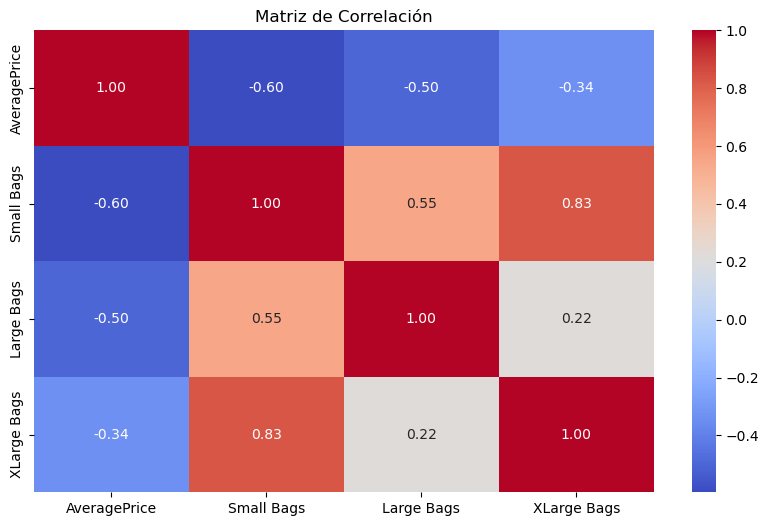

Variables altamente correlacionadas con otras: ['Small Bags', 'XLarge Bags']


In [71]:
df_baggy = df_cp.copy()

region_largest= df_cp.groupby('region')['Total Volume'].sum().nlargest(15).index
df_baggy = df_baggy[df_baggy['region'].isin(region_largest)]

df_baggy['Small Bags ratio'] = df_baggy['Small Bags'] / df_baggy['Total Bags']
df_baggy['Large Bags ratio'] = df_baggy['Large Bags'] / df_baggy['Total Bags']
df_baggy['XLarge Bags ratio'] = df_baggy['XLarge Bags'] / df_baggy['Total Bags']

df_baggy=df_baggy[df_baggy['region']=='LosAngeles']

corr_df= df_baggy[['AveragePrice', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

<AxesSubplot: xlabel='region'>

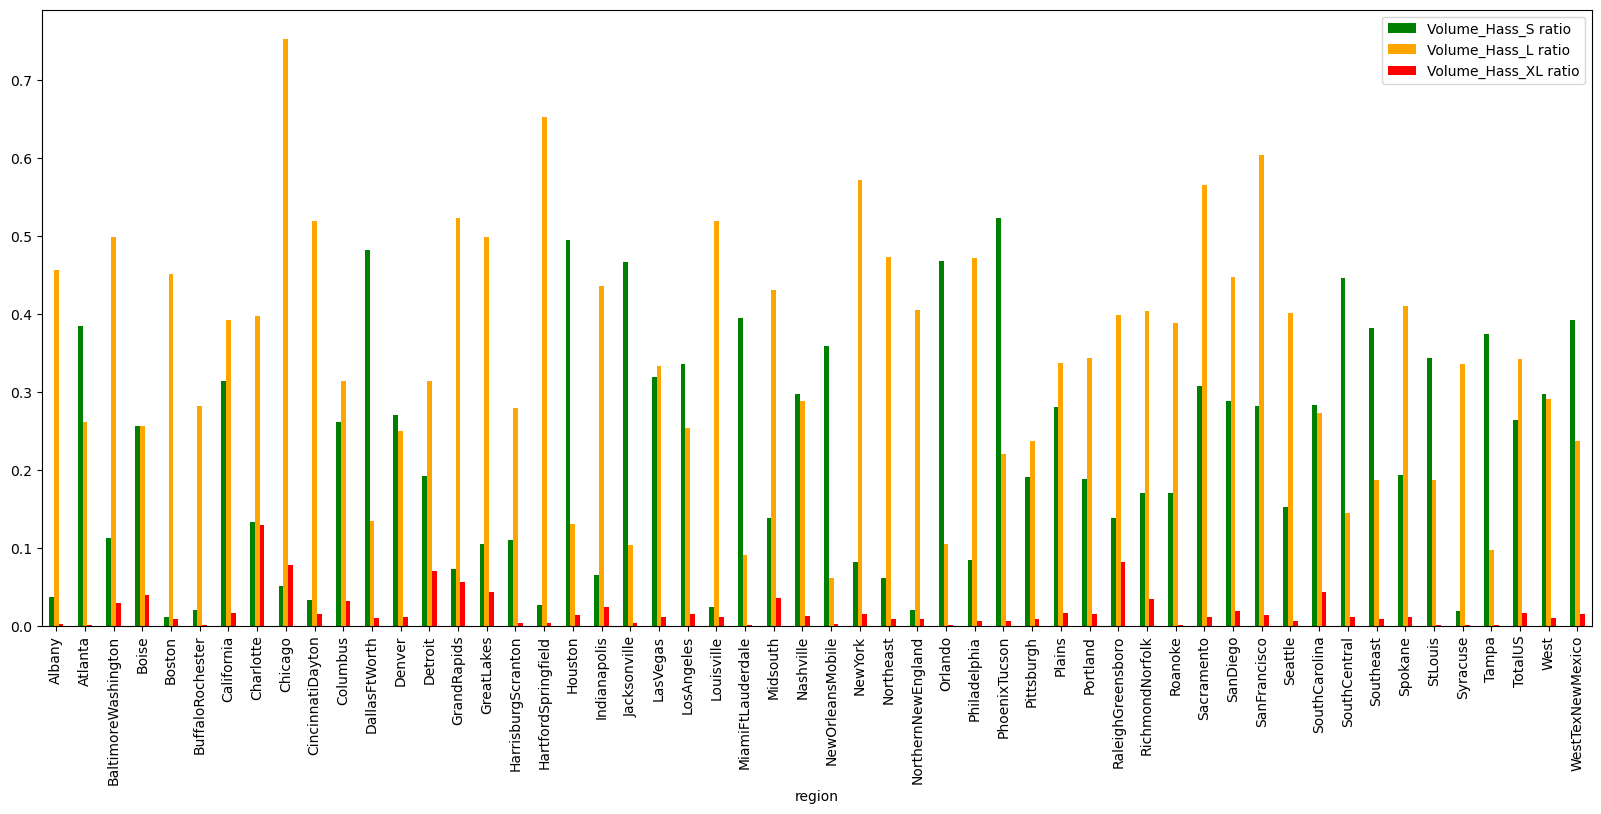

In [ ]:
df_avocado_size = df_cp.copy()
df_avocado_size['Volume_Hass_S ratio'] = df_avocado_size['Volume_Hass_S'] / df_avocado_size['Total Volume']
df_avocado_size['Volume_Hass_L ratio'] = df_avocado_size['Volume_Hass_L'] / df_avocado_size['Total Volume']
df_avocado_size['Volume_Hass_XL ratio'] = df_avocado_size['Volume_Hass_XL'] / df_avocado_size['Total Volume']

fig, ax= plt.subplots(figsize=(20,8))
ratio_bag=df_avocado_size.groupby('region')[['Volume_Hass_S ratio', 'Volume_Hass_L ratio', 'Volume_Hass_XL ratio']].mean()
ratio_bag.plot(kind='bar', color=['green', 'orange', 'red'],ax=ax )

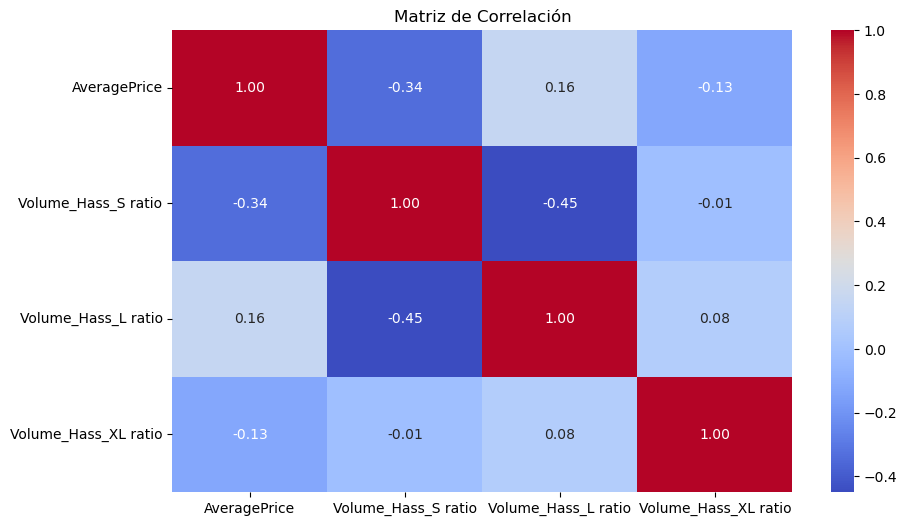

Variables altamente correlacionadas con otras: []


In [73]:
corr_df= df_avocado_size[['AveragePrice', 'Volume_Hass_S ratio', 'Volume_Hass_L ratio', 'Volume_Hass_XL ratio']]
# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

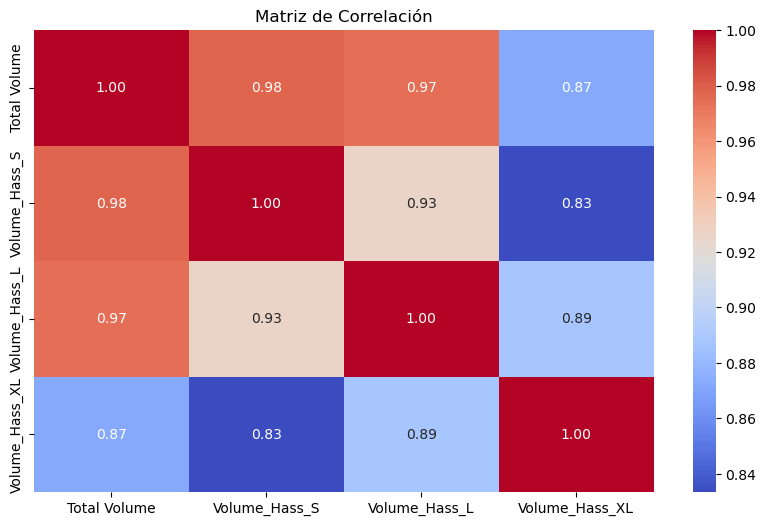

Variables altamente correlacionadas con otras: ['Total Volume', 'Volume_Hass_S', 'Volume_Hass_L', 'Volume_Hass_XL']


In [76]:
corr_df= df_cp_cleaned[['Total Volume', 'Volume_Hass_S', 'Volume_Hass_L', 'Volume_Hass_XL']]
# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

In [81]:
#df_cp_cleaned['Suma Volums'] = df_cp_cleaned['Volume_Hass_S' ]+ df_cp_cleaned['Volume_Hass_L']+ df_cp_cleaned['Volume_Hass_XL' ]
df_cp_cleaned['Variacio'] = (df_cp_cleaned['Total Volume'] - df_cp_cleaned['Suma Volums'])*100/df_cp_cleaned['Total Volume']
smallest_regions= df_cp_cleaned[df_cp_cleaned['region'].isin(region_largest) ]
small_group = df_cp_cleaned.groupby('region')['Variacio'].mean().sort_values()
small_group

region
SanFrancisco            9.955330
Sacramento             11.691686
Chicago                11.763706
SanDiego               24.562791
PhoenixTucson          25.091574
California             27.893113
HartfordSpringfield    31.802313
NewYork                33.026166
LasVegas               33.643763
Charlotte              34.138870
GrandRapids            34.893758
GreatLakes             35.297427
Atlanta                35.354104
WestTexNewMexico       35.650211
BaltimoreWashington    35.874110
Houston                36.019133
Plains                 36.695516
DallasFtWorth          37.400859
TotalUS                37.831299
RaleighGreensboro      38.106545
Spokane                38.631778
RichmondNorfolk        39.126347
Columbus               39.384025
LosAngeles             39.535156
Midsouth               39.536758
SouthCentral           39.728916
West                   40.108429
SouthCarolina          40.156343
Nashville              40.208491
Southeast              42.267471
Det

In [82]:
grouper = df_cp_cleaned.groupby('region')['Total Volume'].sum().nlargest(10).index


<AxesSubplot: >

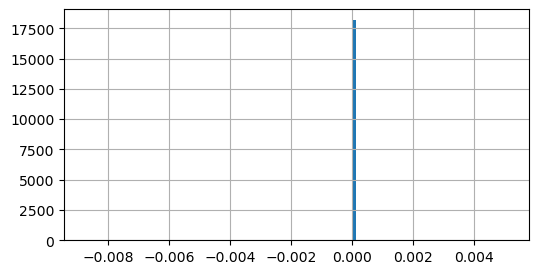

In [ ]:
bags_df = df_cp_cleaned.copy()
bags_df['Suma Bags'] = bags_df['Small Bags']+ bags_df['Large Bags']+ bags_df['XLarge Bags']
bags_df['Variacio Bags'] = (bags_df['Total Bags'] - bags_df['Suma Bags'])*100/bags_df['Total Bags']
fig, ax= plt.subplots(figsize=(6,3))
bags_df['Variacio Bags'].hist(bins=100)

In [85]:
df_cp.head()
df_cp.info()
df_cp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           18249 non-null  int64         
 1   Date            18249 non-null  datetime64[ns]
 2   AveragePrice    18249 non-null  float64       
 3   Total Volume    18249 non-null  float64       
 4   Volume_Hass_S   18249 non-null  float64       
 5   Volume_Hass_L   18249 non-null  float64       
 6   Volume_Hass_XL  18249 non-null  float64       
 7   Total Bags      18249 non-null  float64       
 8   Small Bags      18249 non-null  float64       
 9   Large Bags      18249 non-null  float64       
 10  XLarge Bags     18249 non-null  float64       
 11  type            18249 non-null  object        
 12  year            18249 non-null  int64         
 13  region          18249 non-null  object        
 14  region_class    18249 non-null  object        
 15  Su

index                           Date  AveragePrice  \
count  18249.000000                          18249  18249.000000   
mean    9124.000000  2016-08-13 23:30:43.498273792      1.405978   
min        0.000000            2015-01-04 00:00:00      0.440000   
25%     4562.000000            2015-10-25 00:00:00      1.100000   
50%     9124.000000            2016-08-14 00:00:00      1.370000   
75%    13686.000000            2017-06-04 00:00:00      1.660000   
max    18248.000000            2018-03-25 00:00:00      3.250000   
std     5268.176867                            NaN      0.402677   

       Total Volume  Volume_Hass_S  Volume_Hass_L  Volume_Hass_XL  \
count  1.824900e+04   1.824900e+04   1.824900e+04    1.824900e+04   
mean   8.506440e+05   2.930084e+05   2.951546e+05    2.283974e+04   
min    8.456000e+01   0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.083858e+04   8.540700e+02   3.008780e+03    0.000000e+00   
50%    1.073768e+05   8.645300e+03   2.906102e+04    1.849900e+02   
75%    4.329623e+05   1.110202e+05   1.502069e+05    6.243420e+03   
max    6.250565e+07   2.274362e+07   2.047057e+07    2.546439e+06   
std    3.453545e+06   1.264989e+06   1.204120e+06    1.074641e+05   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   

        Suma Volums     %Variacio      Variacio  
count  1.824900e+04  1.824900e+04  1.824900e+04  
mean   6.110027e+05  4.081105e+01  4.081105e+01  
min    2.000000e+00 -1.437959e-14 -1.437959e-14  
25%    4.972720e+03  2.289239e+01  2.289239e+01  
50%    5.819536e+04  3.530270e+01  3.530270e+01  
75%    3.078016e+05  5.592322e+01  5.592322e+01  
max    4.473616e+07  9.981796e+01  9.981796e+01  
std    2.517799e+06  2.424225e+01  2.424225e+01

* Ara que tenim una idea de les dades, tractem de veure que podem treure a trets generals de la informacio. Quines son les variables més importants, efectives...
### Primers gràfics
#### Estudi per tipus de alvocats

* Aqui es veu clarament que el alvocat més relevant es el convencional per ordres de magnitud, per ho que seria relevant fer algún estudi del subset eliminant els organics o estudian-los per separat.
* Addicionalment, l'any 2018 no esta complert, pot afectar a les dades.

<AxesSubplot: xlabel='year,type'>

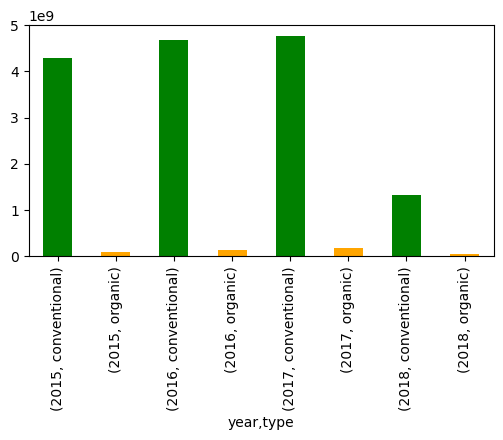

In [105]:
grouped = df_cp.groupby(['year', 'type'])['Total Volume'].sum()
fig, ax= plt.subplots(figsize=(6,3))
#TODO: plt.xticks(rotation=45)
grouped.plot(kind='bar', color=['g', 'orange'])


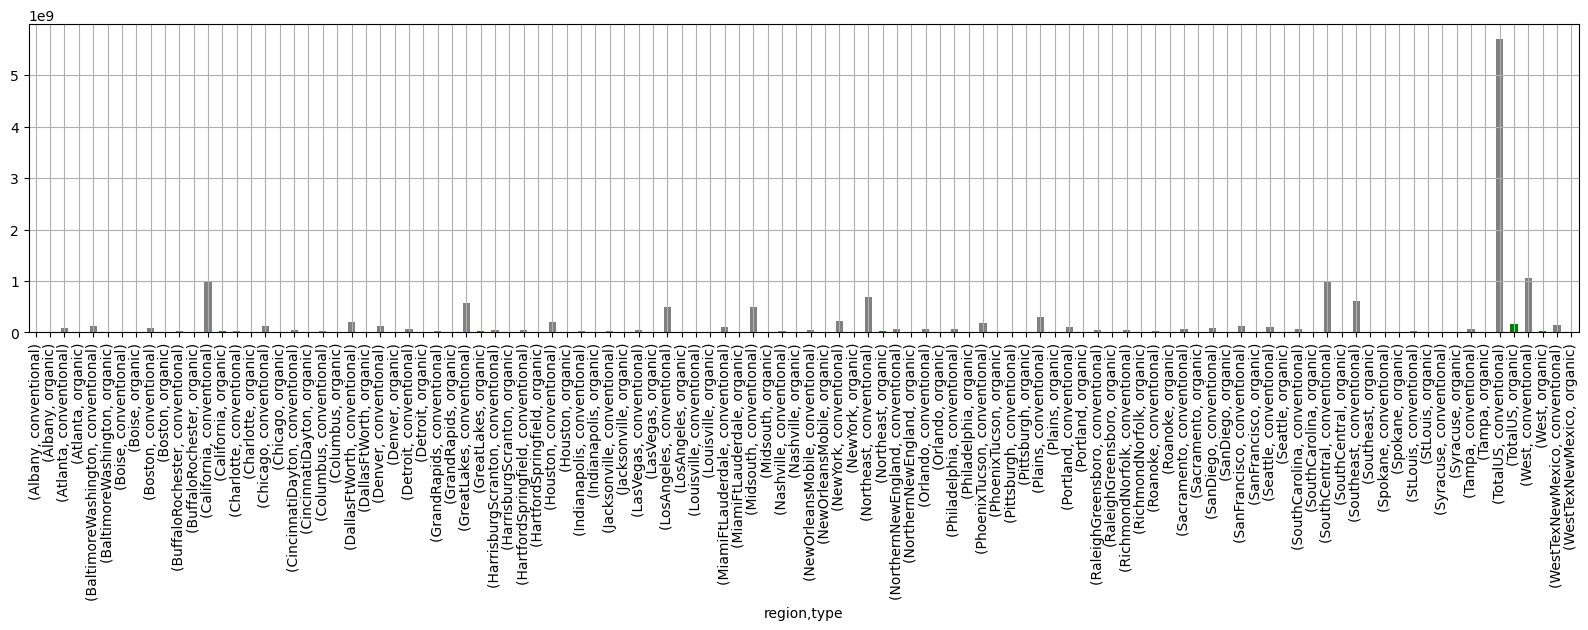

In [107]:
# Aqui veiem que existeixen unes regions mes relevants que altres. Caldria fer una separació?

df_subset = df_cp#[df_cp['region']!= 'TotalUS']
pd.unique(df_subset['region'])

grouped = df_subset.groupby(['region', 'type'])['Total Volume'].sum()

fig, ax= plt.subplots(figsize=(20,4))
grouped.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

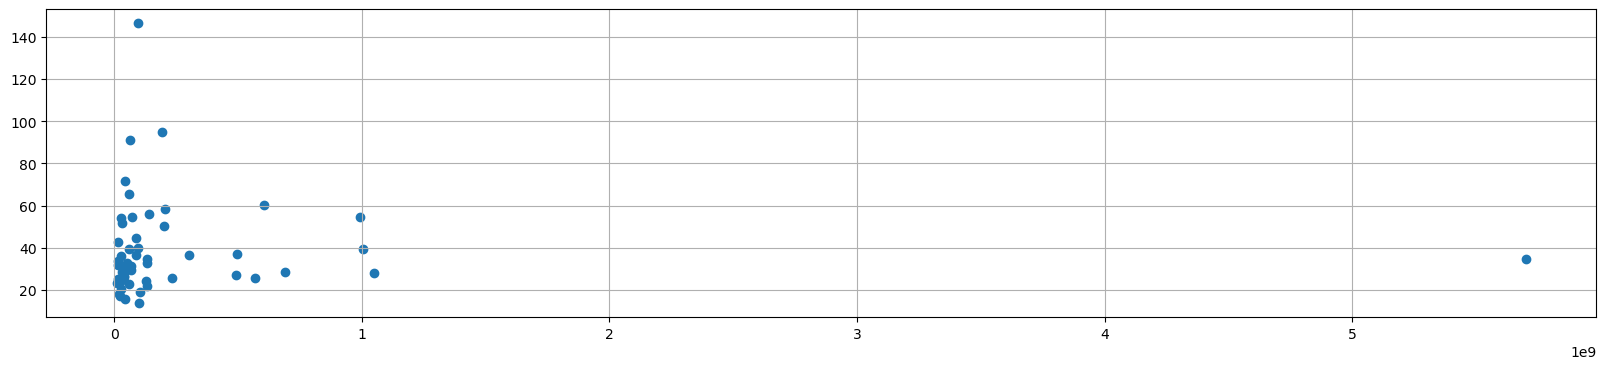

In [ ]:
# Si mirem la proporcio, en general es manté constant. No hi ha ningun interes per a tornar a ho natural a les gran ciutats o extensions.
# Si acas hi ha més divergencia en extensions menors.

unstacked_type= grouped.unstack()
unstacked_type['Proportion'] = unstacked_type['conventional']/unstacked_type['organic']

fig, ax= plt.subplots(figsize=(20,4))
x_values= unstacked_type['conventional']
y_values= unstacked_type['Proportion']

ax.scatter(x=x_values, y= y_values )
# plt.ylim(0, 0.3*10**9)
plt.grid()

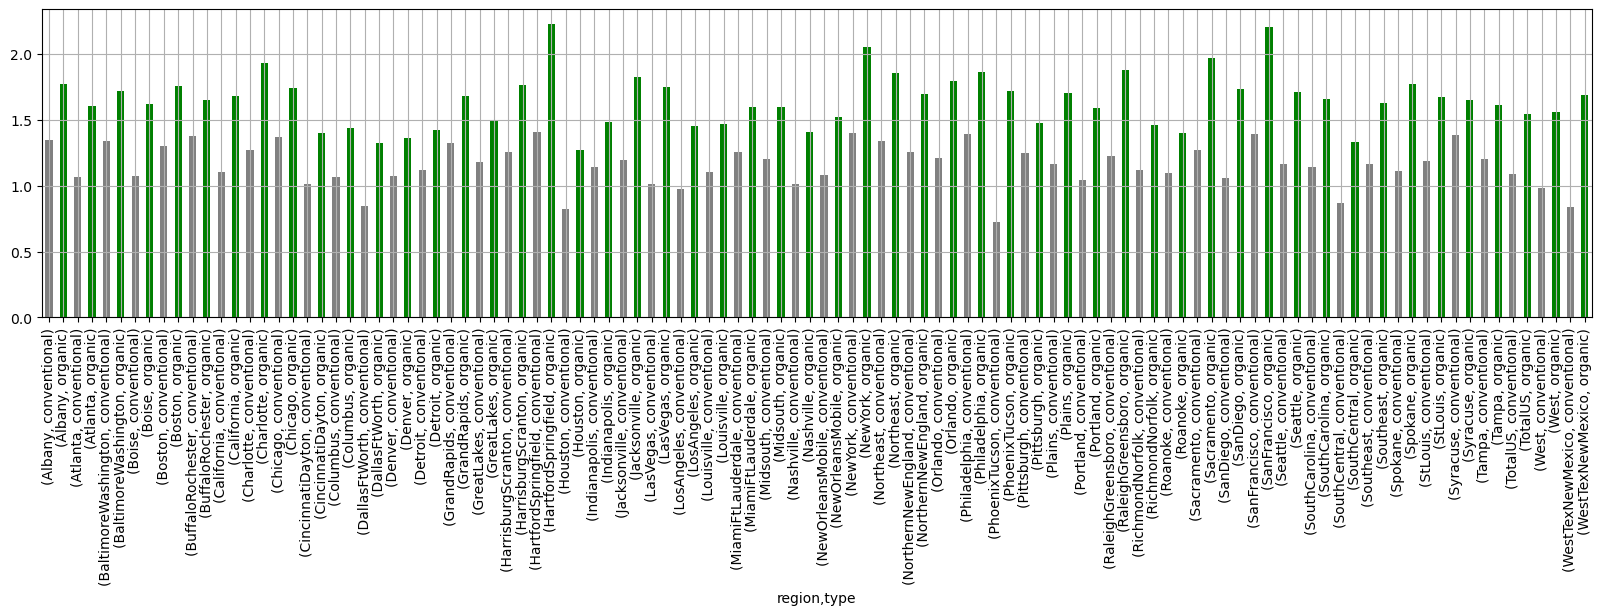

In [ ]:
price_group = df_subset.groupby(['region', 'type'])['AveragePrice'].mean()#.nlargest(10)

fig, ax= plt.subplots(figsize=(20,4))
price_group.plot(kind='bar', ax=ax, color = ['gray', 'green'] )
# plt.ylim(0, 0.3*10**9)
plt.grid()

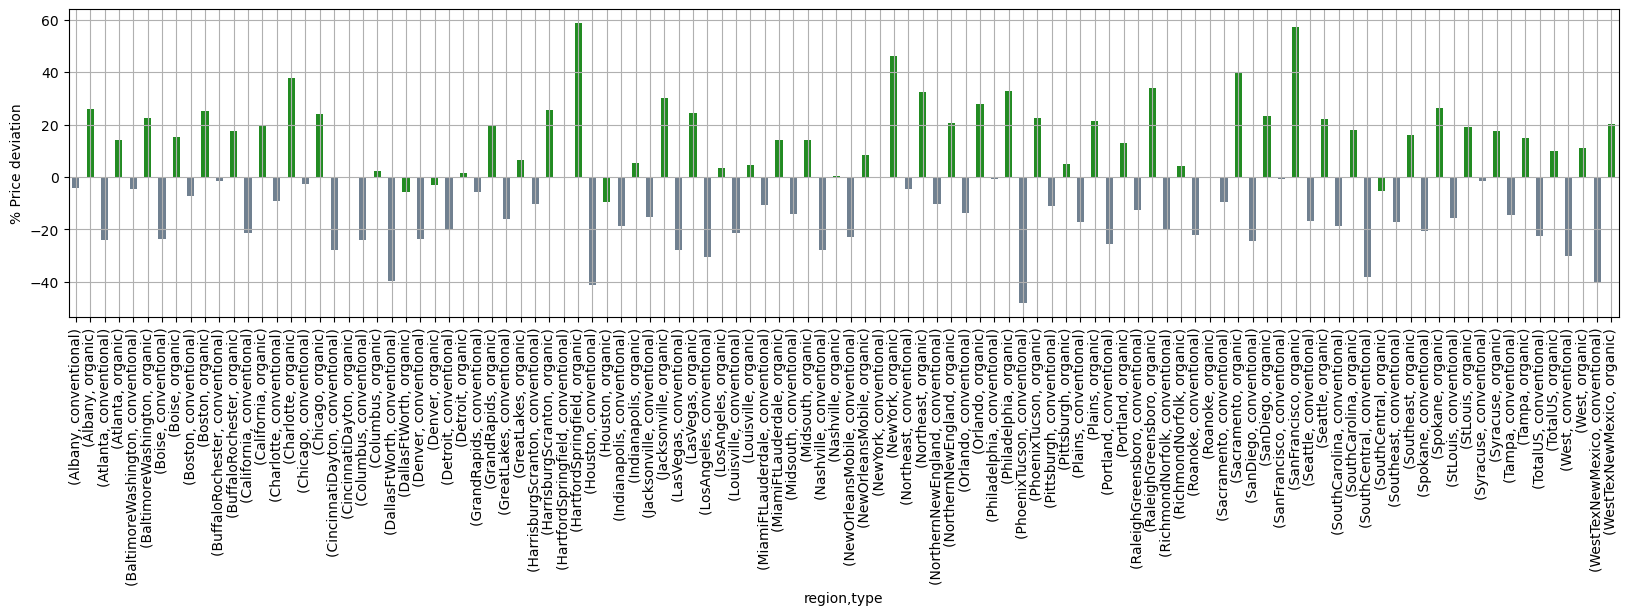

In [ ]:
## Aquest gràfic es espectacular, y ens permet veure que sempre són els alvocats orgànics els que costen més que la mitjana.
avocados_region_mean = df_subset.groupby(['region','type'])['AveragePrice'].mean()#.nlargest(6)
total_mean = df_subset['AveragePrice'].mean()

fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = (avocados_region_mean - total_mean)*100/total_mean
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation', color = ['slategray', 'forestgreen'])
plt.grid()

#### Subset alvocados convencionals
* Aqui tendriamos que incluir una idea de si todas las regiones hacen un número similar total de pedidos
* Claramente hay sitios donde los aguacates son más baratos, miremos si tiene que ver con otras características

In [116]:
df_subset = df_cp[df_cp['region']!= 'TotalUS']
df_convencionals = df_subset[df_subset['type']=='conventional']

# df_convencionals
convencional_region_mean = df_convencionals.groupby('region')['AveragePrice'].mean()#.nlargest(6)

classification_colors = {'City':'green' ,'Region':'yellow' ,'GreaterRegion':'orange', 'State':'red', 'TotalUS': 'blue'}
df_cp['region_class']= df_cp['region'].map(av.region_classification)
coloring=convencional_region_mean.index.map(av.region_classification).map(classification_colors)

total_mean = df_convencionals['AveragePrice'].mean()
fig, ax= plt.subplots(figsize=(20,4))
avocados_relative_mean = ((convencional_region_mean - total_mean)*100/total_mean)
avocados_relative_mean.plot(kind = 'bar', ylabel= '% Price deviation')#, color= coloring)#, color= convencional_region_mean.index.map(classification_colors))
plt.grid()

TypeError: region_classification() takes 0 positional arguments but 1 was given

### REGRESIONES Y PROYECCIONES

#### Creación del modelo de regresión

#### Creación de modelo predictivo de ventas por MES usando los datos de años anteriores ( lineal y polinomica ) Calculo R2

#### Creación de modelo predictivo de ventas por TRIMESTRE usando los datos de años anteriores ( lineal y polinomica ) Calculo R2

#### Creación de modelo predictivo de ventas por AÑO usando los datos de años anteriores ( lineal y polinomica ) Calculo R2

#### Modelos de regresión multiple entre todas las variables según  apartado 5.6. En especial, precio medio y relación con diferentes calibres.Precio vs Total Bags

#### Analisis de coeficientes de regresion multiple. Afectación de cada variable al AvgPrice apartado 5.7

#### Modelos de regresión para diferenciar volumenes de ventas Apartado 5.8 . Calibres y AveragePrice.

#### Creación de modelo de regresión y polinómica de ventas totales sobre precio promedio ( por regiones o no ) apartado 5.9

#### Predicciones

#### Predicción de precio promedio según volumen aguacates y por tipo ( y por calibres ??) . Lineal y Polinomica. Calculo de R2